# 2021-03-24 WS2_0 Speech Processing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/osaukh/mobile_computing_lab/blob/master/2021-03-24__WS2_0__Speech_Processing.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/osaukh/mobile_computing_lab/blob/master/2021-03-24__WS2_0__Speech_Processing.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Speech Processing Fundamentals

We use <a href="https://librosa.github.io/librosa/">LibROSA</a>, a Python library to learn the basics of signal processing. Make sure the library is installed on your laptop:

In [9]:
!pip install librosa
!apt-get --assume-yes install ffmpeg

You should consider upgrading via the '/Users/ahinea/work/pyenv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 573 kB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/ahinea/work/pyenv/bin/python3 -m pip install --upgrade pip' command.
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=36a83a0715756916cc53003d82c664a17ea82b31ec84fb7bab59a3ea5fe24f67
  Stored in directory: /Users/ahinea/Library/Caches/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
You should consider upgrading via the '/Users/ahinea/work/pyenv/bin/python3 -m pip install --upgrade pip' command.


Librosa supports lots of <a href="https://en.wikipedia.org/wiki/Audio_codec">audio codecs</a>, although <a href="https://en.wikipedia.org/wiki/WAV">.wav(lossless)</a> is widely used when audio data analysis is concerned. You can read a given audio file by simply passing the <code>file_path</code> to <code>librosa.load()</code> function.

Imports

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

File download

In [ ]:
!wget https://github.com/osaukh/mobile_computing_lab/raw/master/img/speechprocessing/1995-1826-0004.wav

Read file content and show statistics

In [13]:
file_path="1995-1826-0004.wav"
samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

print("Number of samples:", len(samples))
print("Sampling rate:", sampling_rate)
print ("Duration:",  len(samples) / sampling_rate, " seconds")

/Users/ahinea/work/pyenv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


FileNotFoundError: [Errno 2] No such file or directory: '1995-1826-0004.wav'

Yes, you can play the audio inside your jupyter-notebook! IPython gives us a widget to play audio files through notebook.

In [5]:
from IPython.display import Audio
Audio(file_path)

We can easily plot the audio signal over time. LibROSA provides a utility function <code>waveplot()</code> as shown below.

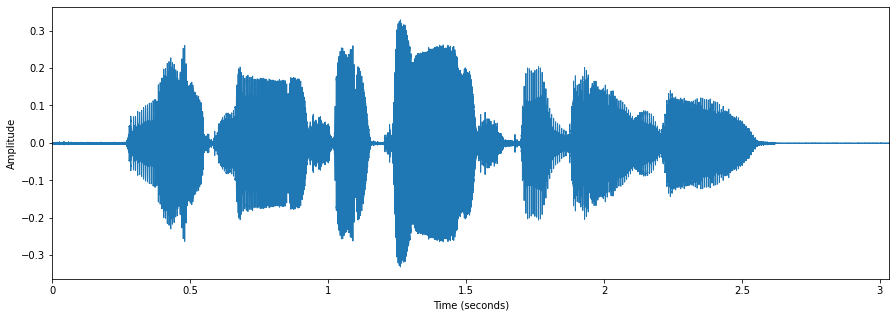

In [65]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

An audio signal is a complex signal which travel together as a disturbance (pressure-change) in the medium. When sound is recorded we only capture the resultant amplitudes of those multiple waves. <a href="https://en.wikipedia.org/wiki/Fourier_transform">Fourier Transform</a> decomposes a signal into its constituent frequencies. We obtain what we call a <a href="https://en.wikipedia.org/wiki/Spectrogram">spectrogram</a>!

The Mel Scale (Mel comes from the word melody) is a perceptual scale of pitches that are considered by human ears to be equal in distance from one another.

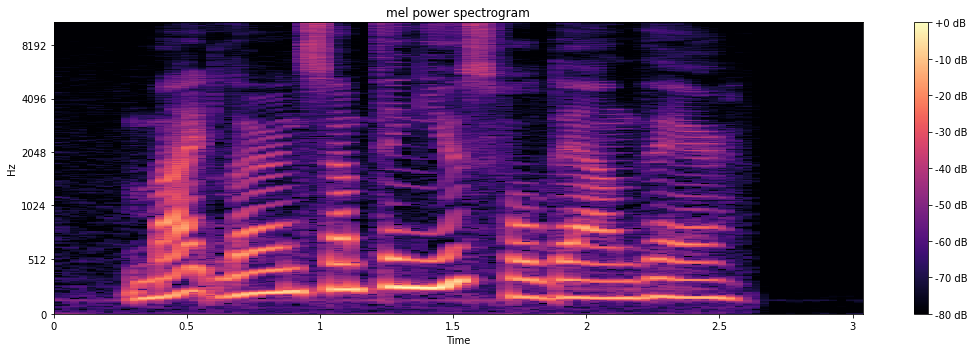

In [119]:
# Mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(samples, sr=sampling_rate, n_mels=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(15,5))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show() 

<a href="https://en.wikipedia.org/wiki/Mel-frequency_cepstrum">MFCC are Mel Frequency Cepstral Coefficients</a>. For a very basic understanding, <a href="https://en.wikipedia.org/wiki/Cepstrum">cepstrum</a> is the information of rate of change in spectral bands. In the conventional analysis of time signals, any periodic component (e.g., echoes) shows up as sharp peaks in the corresponding frequency spectrum (ie, Fourier spectrum. This is obtained by applying a Fourier transform on the time signal). On taking the log of the magnitude of this Fourier spectrum, and then again taking the spectrum of this log by a cosine transformation, we observe a peak wherever there is a periodic element in the original time signal. Since we apply a transform on the frequency spectrum itself, the resulting spectrum is neither in the frequency domain nor in the time domain and is called the *quefrency* domain. And this spectrum of the log of the spectrum of the time signal was named <a href="https://en.wikipedia.org/wiki/Cepstrum">cepstrum</a>.

Any sound generated by humans is determined by the shape of their vocal tract (including tongue, teeth, etc). If this shape can be determined correctly, any sound produced can be accurately represented. The following block diagram is a step-wise summary of how we arrived at MFCCs:

<img src="https://miro.medium.com/max/1714/1*dWnjn5LLS0j8St53ACwqSg.jpeg" width="500"/>

<a href="https://en.wikipedia.org/wiki/Filter_bank">Filter bank</a> refers to the Mel filters (coverting to Mel Scale) and Cepstral Coefficients are MFCCs.

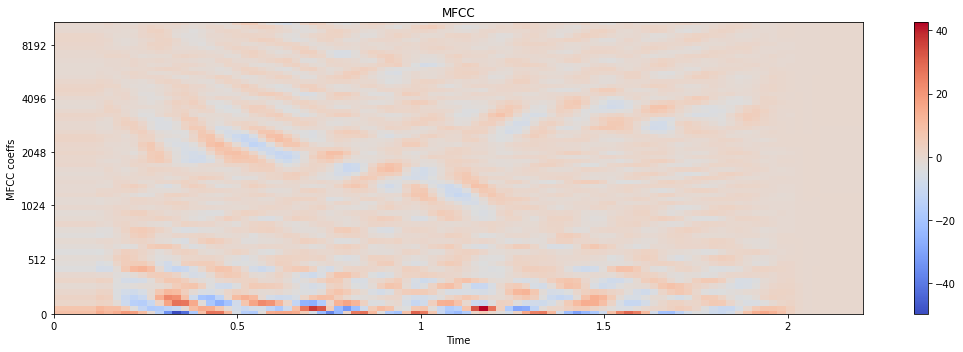

In [113]:
# MFCC_coeffs
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=64)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(15, 5))
librosa.display.specshow(delta2_mfcc, x_axis='time', y_axis='mel')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Compute spectogram of an audio wave</b>: 
<ul><li>Extend the SpeechProcessing app to periodically compute a spectogram from a framgment of the signal and display the results on the screen.
</li></ul>
</div>


## Audio Processing and Deep Learning
<div class="alert alert-block alert-info">
This part of the workshop is based on the series of posts by Daniel Rothmann:
<ul>
    <li>Medium: <a href="https://towardsdatascience.com/the-promise-of-ai-in-audio-processing-a7e4996eb2ca">The promise of AI in audio processing</a></li>
    <li>Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-1-3-a5713af6e2f8">Human-Like Machine Hearing With AI (1/3)</a></li>
    <li>Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-2-3-f9fab903b20a">Human-Like Machine Hearing With AI (2/3)</a></li>
    <li>Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-3-3-fd6238426416">Human-Like Machine Hearing With AI (3/3)</a></li>
    <li>Medium: <a href="https://towardsdatascience.com/whats-wrong-with-spectrograms-and-cnns-for-audio-processing-311377d7ccd">What’s wrong with CNNs and spectrograms for audio processing?</a></li>
</ul>
</div>

In recent years, great results have been achieved in generating and processing images with neural networks. This can partly be attributed to the great performance of deep CNNs to capture and transform high-level information in images. 
However, we are still in the early days of AI application in audio processing. Deep learning methods allow us to approach signal processing problems from a new perspective which is still largely ignored in the audio industry. The understanding of sound is a very complex task and problems that we, as humans, intuitively find quite easy often turn out to be very difficult to solve for a machine.

<div class="alert alert-block alert-warning">
<b>Source separation example.</b> In a scenario where two people are speaking over each other, in your mind, you can imagine either person speaking in isolation without much effort. But how do we describe a formula for separating these two voices? Is there a unified way to describe how human voices sound? If yes, how are parameters of this description affected by sex, age, energy, personality? How does physical proximity to the listener and room acoustics impact this understanding? What about non-human noise that can occur during the recording? On which parameters can we discriminate one voice over another?
<br/><br/>
As you can see, devising a formula for the full extent of this problem would require attention to a lot of parameters. Here, AI can provide a more pragmatic approach. See a research paper below, which uses a convolutional recurrent neural network architecture.
<br/>
<ul>
    <li><a href="http://www.cs.tut.fi/~tuomasv/papers/PID4978439.pdf">Low Latency Sound Source Separation Using Convolutional Recurrent Neural Networks</a>, 2017.</li>
</ul>
</div>

One of the interesting early publications on audio processing with deep learning was the publication of <a href="https://deepmind.com/blog/wavenet-generative-model-raw-audio/">Google Deepmind’s “WaveNet”</a> - a deep learning model for generating audio recordings which was released in 2016. Using an adapted network architecture, a dilated convolutional neural network, Deepmind researchers succeeded in generating very convincing text-to-speech and some interesting music-like recordings trained from classical piano recordings.

<img src="https://miro.medium.com/max/2572/1*0TbaaX8l86ghbGEhuSjPzw.jpeg" width="700"/>

WaveNet was among the first successful attempts to generate audio on a raw sample level. The one big problem here is that CD quality audio is usually stored with 44.1 kHz samples per second and thus, generating *seconds* of sound with WaveNet takes *hours*. This excludes the method from having use in real-time applications. It’s just a lot of data to make sense of.

Convolutional neural networks are designed with inspiration from the human visual system, loosely based on how information flows into the visual cortex. However, there are several problems related to this approach. Essentially, we are taking audio, translating it to images and performing visual processing on that image before translating it back to audio. So, we are doing machine vision to do machine hearing. But, these two senses don’t function in the same way. Looking at the spectrogram below, how much meaning can you (with your smart human brain) actually gather about the content of the audio? If you could listen to it, you would quickly get an intuitive understanding of what is happening.

<img src="https://miro.medium.com/max/1356/1*sbXTep0McbTJUxQUGCo21Q.png" width="600"/>

__Legend__: A five-second spectrogram. Can you tell what it is? (It’s a blues harp.)

There are several challanges related to applyting deep learning to audio processing. Keep reading about some of them and check references at the bottom of the page.

#### Sounds are “transparent”

One challenge posed in the comparison between visual images and spectrograms is the fact that visual objects and sound events do not accumulate in the same manner. To use a visual analogy, one could say that sounds are always “transparent” whereas most visual objects are opaque. When encountering a pixel of a certain color in an image, it can most often be assumed to belong to a single object. Discrete sound events do not separate into layers on a spectrogram: Instead, they all sum together into a distinct whole. *That means that a particular observed frequency in a spectrogram cannot be assumed to belong to a single sound as the magnitude of that frequency could have been produced by any number of accumulated sounds or even by the complex interactions between sound waves such as phase cancellation. This makes it difficult to separate simultaneous sounds in spectrogram representations.*

<img src="https://miro.medium.com/max/4000/1*M94npWRtDfdyqTj4M5YbAw.png" width="600"/>

__Legend__: Three examples of difficult scenarios of spectrogram analysis. (Left): Two similar tones cause uneven phase cancellations across frequencies. (Middle): Two simultaneous voices with similar pitch are difficult to tell apart. (Right): Noisy and complex auditory scenes make it particularly difficult to distinguish sound events.

#### The axes of spectrograms do not carry the same meaning

CNNs for images use two-dimensional filters that share weights across the x and y dimensions. This builds on the assumption that features of an image carry the same meaning regardless of their location. For this to be true, you should also assume that the x and y axes of the data have the same implications to the meaning of the content. For example, a face is still a face regardless of whether it is moved horizontally or vertically in an image.

In spectrograms, the two dimensions represent fundamentally different units, one being strength of frequency and the other being time. Moving a sound event horizontally offsets its position in time and it can be argued that a sound event means the same thing regardless of when it happens. However, moving a sound vertically might influence its meaning: Moving the frequencies of a male voice upwards could change its meaning from man to child or goblin, for example. Therefore, the spatial invariance that 2D CNNs provide might not perform as well for this form of data.

#### The spectral properties of sounds are non-local

In images, similar neighboring pixels can often be assumed to belong to the same visual object but in sound, frequencies are most often non-locally distributed on the spectrogram. Periodic sounds are typically comprised of a fundamental frequency and a number of harmonics which are spaced apart by relationships dictated by the source of the sound. It is the mixture of these harmonics that determines the timbre of the sound.

In the instance of a female vocal, the fundamental frequency at a moment in time might be 200Hz while the first harmonic is 400Hz, the next 600Hz and so on. These frequencies are not locally grouped but they move together according to a common relationship. This further complicates the task of finding local features in spectrograms using 2D convolutions as they are often unevenly spaced apart even though they move according to the same factors.

#### Sound is inherently serial

When assessing a visual environment, we can “scan” our surroundings multiple times to locate each visual object in a scene. Since most objects are non-moving, light will reflect from them in a predictable manner and one can make a mental map of their placement in a physical scene. From a perceptual point of view then, the visual objects are assumed to continue to exist at their observed location, even when you look elsewhere.

This is not true for sounds. Sound takes the physical form of pressure waves and, from the point of view of a listener, such waves exist only in their current state at one moment in time. Once the moment has passed, the wave has passed by, traveling away from the observer. This is why it makes sense to refer to these phenomena as sound events rather than objects. From a physical perspective, this means that listeners experience sound only a moment at a time. Where images can be regarded to contain larger amounts of static parallel information, sound, then, is highly serial.

These reasons suggest that audio as a medium for conveying meaning is fundamentally serial and more temporally dependent than video which presents another reason why visual spectrogram representations of sounds fed into image processing networks without temporal awareness might not work optimally.

## Speech Processing App Skeleton

You are provided the code of a sample app which reads the microphone input and shows the audio wave on the screen. The app should give you a good starting point to implement and test different speech processing algorithms. Below is a screenshot of the SpeechProcessing app in action:

<img src="img/speechprocessing/speech_processing_screenshot.jpg" width="240">

<div class="alert alert-block alert-success">
<b>Run the app on your smartphone AND undestand the code</b>: 
<ul><li>
<a href="code/SpeechProcessing">Source code</a> (kudos for some parts of the code to Jakub Lukac)</li>
<li>When running the app on your smartphone for the first time, grant it permissions to access the microphone: Settings -> Apps -> SpeechProcessing -> Permissions.
</li></ul>
</div>

### Notes on the Code

Some important settings we use in <code>AudioRecorder</code> class: sampling rate of the audio signal is 44.1 kHz, only one channel for processing (mono, no stereo), the encoding is 32 bit IEEE single precision float values (<code>ENCODING_PCM_FLOAT</code>). Note that this encoding requires at least API level 22 (see <a href="https://source.android.com/setup/start/build-numbers">Platform codenames, versions, API levels</a>). Android audio format options are detailed in the manual <a href="https://developer.android.com/reference/android/media/AudioFormat">AudioFormat</a>.

```Java
import android.media.AudioFormat;
import android.media.AudioRecord;
import android.media.MediaRecorder;

public class AudioRecorder {
    ...
    private static final int RECORDING_RATE = 44100;
    private static final int CHANNEL = AudioFormat.CHANNEL_IN_MONO;
    private static final int FORMAT = AudioFormat.ENCODING_PCM_FLOAT;
    ...
}

```

We create an instance of the <code>AudioRecord</code> class to start recording audio data:

```Java
public class AudioRecorder {
    ...
    private AudioRecord audioRecord;
    
    public void startRecording() {
        audioRecord = new AudioRecord(
                MediaRecorder.AudioSource.MIC,
                RECORDING_RATE,
                CHANNEL,
                FORMAT,
                MIN_BUFFER_SIZE_IN_BYTES);
        ...
            
        audioRecord.startRecording();
        ...
   }
   ...
```

In addition, we need to execute tasks within two threds: 1) periodically read audio data from the buffer, and 2) process the data by the registered callbacks implemented by the listeners.

```Java
public class AudioRecorder {
    ...
    private final List<AudioRecorderDataReceiveListener> dataReceiveListeners;    
    private final Handler recordingHandler;
    private final Handler callbacksHandler;
    ...
        
    public AudioRecorder() {
        ...
        HandlerThread recordingThread = new HandlerThread("RecordingThread");
        HandlerThread callbacksThread = new HandlerThread("CallbacksExecThread");
        recordingThread.start();
        callbacksThread.start();

        recordingHandler = new Handler(recordingThread.getLooper());
        callbacksHandler = new Handler(callbacksThread.getLooper());
        dataReceiveListeners = new ArrayList<>();
        ...
    }
    
    public void startRecording() {
        ...
        handler.post(createRecurringReadAudioTask());
    }
    
    private Runnable createRecurringReadAudioTask() {
        return new Runnable() {
            @Override
            public void run() {
                // schedule next read
                recordingHandler.post(createRecurringReadAudioTask());
                ...
                int readSamples = audioRecord.read(
                    audioBuffer, 0, audioBuffer.length, AudioRecord.READ_BLOCKING);
                ...
                if (readSamples > 0) {
                    // asynchronous samples processing listeners, 
                    // each executed in a separate "CallbacksExecThread" thread
                    asyncProcessReceivedData(audioBuffer, readSamples);
                }
            }
        };
    }
    
    private void asyncProcessReceivedData(final float[] buffer, final int samples) {
        dataReceiveListeners.forEach(listener -> {
            callbacksHandler.post(() -> {
                listener.onDataReceive(buffer, samples);
            });
        });
    }
    ...
}
```

Finally, the <code>SoundVisualizer</code> class is a listener, which visualizes the data on the screen.


```Java
public class SoundVisualizer extends View implements AudioRecorderDataReceiveListener {
    ...
    public void onDataReceive(final float[] data, final int length) {
        // process data
    }
    ...
}
```

The app can be used as a starting point to implement a useful audio processing function.

***

# Your Task:

<img src="img/project_options2.png" width="800">

***
# References, Credits and Further Readings

* Medium: <a href="https://medium.com/using-cnn-to-classify-audio/effects-of-spectrogram-pre-processing-for-audio-classification-a551f3da5a46">Effects of spectrogram pre-processing for audio classification</a>
* Medium: <a href="https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520">Understanding Audio data, Fourier Transform, FFT and Spectrogram features for a Speech Recognition System</a>
* __A series of posts by Daniel Rothmann__:
    * Medium: <a href="https://towardsdatascience.com/the-promise-of-ai-in-audio-processing-a7e4996eb2ca">The promise of AI in audio processing</a>
    * Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-1-3-a5713af6e2f8">Human-Like Machine Hearing With AI (1/3)</a>
    * Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-2-3-f9fab903b20a">Human-Like Machine Hearing With AI (2/3)</a>
    * Medium: <a href="https://towardsdatascience.com/human-like-machine-hearing-with-ai-3-3-fd6238426416">Human-Like Machine Hearing With AI (3/3)</a>
    * Medium: <a href="https://towardsdatascience.com/whats-wrong-with-spectrograms-and-cnns-for-audio-processing-311377d7ccd">What’s wrong with CNNs and spectrograms for audio processing?</a>
* Medium: <a href="https://medium.com/tencent-thailand/music-information-retrieval-part-1-using-librosa-to-extract-audio-features-6e8569537185">Using LibROSA to extract audio features</a>
* Medium: <a href="https://medium.com/@ssaurel/create-an-audio-recorder-for-android-94dc7874f3d">Create an Audio Recorder for Android</a>
* Medium: Medium: <a href="https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0">Getting to Know the Mel Spectrogram</a>
* Medium: <a href="https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd">The dummy’s guide to MFCC</a>
* Medium: <a href="https://towardsdatascience.com/how-wavenet-works-12e2420ef386">How WaveNet Works</a>
* Code snippets: <a href="https://www.programcreek.com/python/example/98227/librosa.display">Python <code>librosa.display()</code> Examples</a>
* Book: <a href="http://dl.booktolearn.com/ebooks2/engineering/digitalsignalprocessing/9781856179218_digital_signal_processing_101_adae.pdf"> M. Parker, Digital Signal Processing Everything you need to know to get started, 2010</a>